Замятина Екатерина
476 группа

## Получите  численное  решение  следующих  нелинейных  краевых задач:

$$ a)\hspace{5mm} y^" + p*x*\cos(y) = 0, \hspace{1cm} 0<x\leq 1$$
$$ y'(0)=0; \hspace{5mm} y(1)=0, p=1,4,7,25,50,100 $$

## Теоретическая часть

Перемишем задачу в виде: $$ y" = -p*x\cos(y) = [x=1-x] = -p(1-x)\cos(y) =  f(x,y)$$
$$ y'(1)=0; \hspace{5mm} y(0)=0, p=1,4,7,25,50,100 $$

### Метод стрельбы

Будем сводить решение краевой задачи к задачи Коши вида:

$$ y" = f(x,y) \hspace{1cm} 0<x\leq 1$$
$$y(0) = 0;\hspace{15mm} y'(0)=\alpha$$
При этом: $ \hspace{8,5cm} y(x,\alpha)|_{x=1}=y(1,\alpha)= F(\alpha) = 0$


Как видно из строчки выше, для этого нам надо решить уравнение $F(\alpha)=0$.

Будем решать методом Ньютона.

Задаем $\alpha_0 = 0$

$\alpha_{n+1} = \alpha_n - \dfrac{F(\alpha_n)}{F'(\alpha_n)} = \alpha_n - \dfrac{y(1,\alpha_n)}{y'(1,\alpha_n)}$

Для нахождения y', y будем решать Задачу Коши выписанную выше (но все равно ее продублируем):

$$\begin{equation*}
 \begin{cases}
   y"(x,\alpha) = f(x,y)& x\in[0,1]\\
   y(0,\alpha) = 0 & y'(0,\alpha) = \alpha
 \end{cases}
\end{equation*}  \hspace{5mm}(1)
$$

Продифференцируем уравнение по $\alpha$:

$$ \frac{\partial y^"(x,\alpha)}{\partial \alpha} = \dfrac{\partial f}{\partial x} \dfrac{\partial x}{\partial \alpha} + \dfrac{\partial f}{\partial y} \dfrac{\partial y}{\partial \alpha}$$

Причем $\dfrac{\partial x}{\partial \alpha} = 0$, так как x не зависит от $\alpha$.

Введем новую переменную:    $z(\alpha, x) = \dfrac{\partial y}{\partial \alpha}$
   Тогда начальные условия перепишутся в виде: $z(0,\alpha) = 0 \hspace{5mm} z'(0, \alpha) = 1$  Получим:

$$\begin{equation*}
 \begin{cases}
  z^"(x, \alpha) = \dfrac{\partial f}{\partial y} z(x,\alpha)  & x\in[0,1]\\
   z(0,\alpha) = 0 & z'(0,\alpha) = 1 &
 \end{cases}
\end{equation*} \hspace{5mm} (2)
$$


$$\alpha_{n+1} = \alpha_n - \dfrac{y(1,\alpha_n)}{z(1,\alpha_n)} \hspace {1cm} \alpha_0 = 0$$

### Решение задачи Коши

Перепишем задачу Коши (2) (1) для нашего уравнения:

\begin{equation}
 \begin{cases}
  z^"(x, \alpha) = p(1-x) \sin(y)*z(x,\alpha) & x\in[0,1]\\
   z(1,\alpha) = 0 & z'(0,\alpha) = 1 \\
   \\
   y^"(x,\alpha) = -p(1-x) \cos(y)& x\in[0,1]\\
   y(1,\alpha) = 0 & y'(1,\alpha) = \alpha
 \end{cases}
\end{equation} 


Сведем получившиеся системы к системе первого порядка:


\begin{equation}
 \begin{cases}
  v'(x, \alpha) = p(1 - x) \sin(y)*z(x,\alpha) & x\in[0,1]\\
   v(1,\alpha) = 1 \\
   \\
   z'_x(x, \alpha) = v(x, \alpha) \\
   z(1,\alpha) = 0 \\
   \\
   u_x'(x,\alpha) = -p(1 - x) \cos(y)& x\in[0,1]\\
   u(1,\alpha) = \alpha \\
   \\
   y'_x(x, \alpha)=u(x, \alpha) \\
   y(1,\alpha) = 0 \\
 \end{cases}
\end{equation}

Систему  можно решить явным Методом Ругне Кутта второго порядка:
\begin{equation}
 \begin{cases}
  w(x)' = f(w,x)& x\in (0,1]\\
  w(0) = w_0\\
 \end{cases}
\end{equation}


$$w_{n+1} = w_n +h(b_1r_1 + b_2r_2) = w_n + hr_2$$


$$r1=f(w_n,x_n)$$

$$r2=f(w_n + \frac{h}{2},w_n+ \frac{h}{2}r_1)$$

$$w = (v,z,u,y)^T \hspace{1cm} w_0 =(1,0,\alpha, 0)^T$$

## Практическая часть

### Решение Задачи Коши

In [2]:
import numpy as np

In [3]:
def f(x, w, p):
    v = w[0]
    z = w[1]
    u = w[2]
    y = w[3]
    f = np.ndarray(4)
    
    f[0] = p*(1-x)*np.sin(y)*z
    f[1] = v
    f[2] = -p*(1-x)*np.cos(y)
    f[3] = u
    return f

In [4]:
def Runge_Kutta_method(w0,n, p, marker_end_of_Newton_method = "no"):
    x0 = 0
    h = 1./n
    y = []
    for i in range(n):
        r1=f(x0,w0, p)
        w = w0 + h*f(x0 + 0.5*h, w0 + 0.5*h*r1, p)
        w0 = w
        x0 = x0 + h 
        if (marker_end_of_Newton_method == "end"):
            y.append(w0[3])
    return w[1], w[3], y

### Решение методом Ньютона

$\alpha_{n+1} = \alpha_n - \dfrac{y(1,\alpha_n)}{z(1,\alpha_n)} \hspace {5mm} \alpha_0 = 0 \hspace {5mm}$,    где y z находим из Newton_method

In [5]:
def Newton_method(eps, p):
    a0 = 0
    n = 10000
    a = 1000
    y = 1
    z =1
    while ((y/z)*(y/z) > eps*eps):
        w0 = np.array([1,0,a0,0])
        z,y, mass_y = Runge_Kutta_method(w0,n, p)
        a = a0 - y/z
        a0 = a
    z,y, mass_y = Runge_Kutta_method(w0,n, p, "end")
    return y, mass_y, a

In [10]:
y=[]
a=[]
mass_y=[]
p=[1,4,7]
for i in range(3):
    d, b, c,  = Newton_method(0.0001, p[i])
    y.append(d)
    mass_y.append(b)
    a.append(c)

In [16]:
len(mass_y[0])

10000

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# График y(x) - решение уравнения

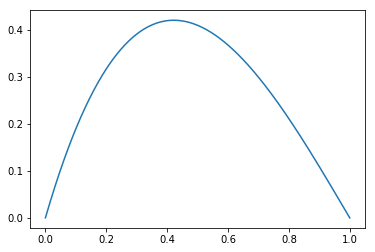

In [18]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import StringIO
import urllib, base64

plt.plot(np.linspace(0,1,len(mass_y[2])), mass_y[2])
fig = plt.gcf()

imgdata = StringIO.StringIO()
fig.savefig(imgdata, format='png')
imgdata.seek(0) # rewind the data

uri = '<img src = "data:image/png;base64,' + urllib.quote(base64.b64encode(imgdata.buf)) + '"/>'

In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import StringIO
import urllib, base64
import numpy as np
plt.plot(range(10),np.exp(range(10)))#тут создаешь свой график
fig = plt.gcf()

imgdata = StringIO.StringIO()
fig.savefig(imgdata, format='png')
imgdata.seek(0) # rewind the data

uri = '<img src = "data:image/png;base64,' + urllib.quote(base64.b64encode(imgdata.buf)) + '"/>'

In [2]:
import pandas as pd

In [3]:
df1 = pd.DataFrame(range(10))
df1['Plot'] = [uri]*10
df1

,0,Plot
0,0,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
1,1,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
2,2,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
3,3,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
4,4,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
5,5,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
6,6,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
7,7,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
8,8,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."
9,9,"<img src = ""data:image/png;base64,iVBORw0KGgoA..."


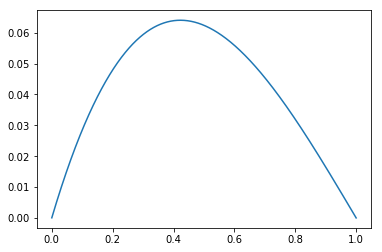

In [11]:
plt.plot(np.linspace(0,1,len(mass_y)), mass_y)

## Найденные параметры альфа и y[1]

In [12]:
('y[1] = {}, alpha = {}').format(y , a)

'y[1] = 5.71732536255e-08, alpha = 0.332981713873'

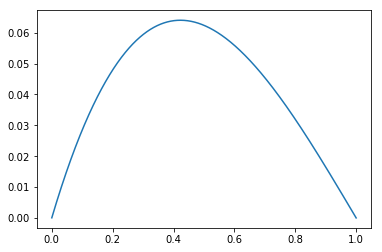

In [26]:
df2 = pd.DataFrame({ 'p =  1' :  [y, a, plt.plot(np.linspace(0,1,len(mass_y)), mass_y)],
                     
                    }, index = ["y", "alpha", "График"])

In [28]:
df2

,p = 1
y,5.71733e-08
alpha,0.332982
График,[Line2D(_line0)]
